<a href="https://colab.research.google.com/github/tu-ru-tunc/PVLubimova/blob/main/2_%D1%86%D0%B5%D0%BD%D1%82%D1%80_%D0%B6%D0%B5%D0%BB%D1%82%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving scale_1200.jpg to scale_1200 (17).jpg


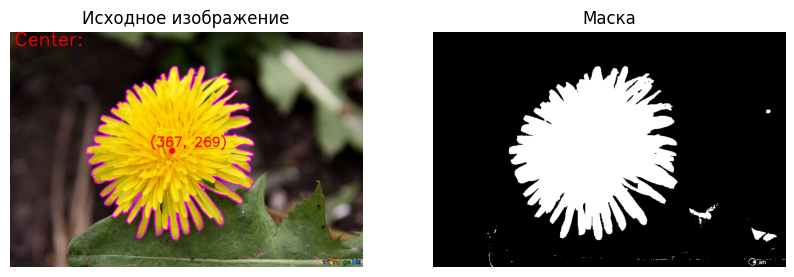

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

uploaded = files.upload()
image_path=next(iter(uploaded))

#считываем кадр
frame = cv2.imread(image_path)

#преобразуем в HSV
frame_HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#задаем пороги желтого
low_yellow = np.array([10, 110, 110])
high_yellow = np.array([30, 255, 255])

#применяем пороги к картинке
mask = cv2.inRange(frame_HSV, low_yellow, high_yellow)
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

count = 0
for contour in contours:
  area = cv2.contourArea(contour)
  if area > 1000:
    count += 1
# все контуры, цвет (255,0,255), толщина 2,
    cv2.drawContours(frame, contour, -1, (255,0,255), 2)
    if contours:
    # Выберите самый большой контур
     largest_contour = max(contours, key=cv2.contourArea)
    # Вычислите моменты
     M = cv2.moments(largest_contour)
    # Вычислите координаты центра
     if M['m00'] != 0:  # Избегаем деления на ноль
       cX = int(M['m10'] / M['m00'])
       cY = int(M['m01'] / M['m00'])
     else:
      cX, cY = 0, 0  # Если контур имеет нулевую площадь
    # Отобразите результат
cv2.circle(frame, (cX, cY), 7, (0, 0, 255), -1)  # Рисуем центр
cv2.putText(frame, f"({cX}, {cY})", (cX - 50, cY - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2.putText(frame, f"Center: ", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 2)

#выводим кадр
plt.figure(figsize=(10,5)) #размер в дюймах
plt.subplot(1,2,1)
plt.title('Исходное изображение')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,2,2)
plt.title('Маска')
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()